In [1]:
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import scipy as ss
import scipy.stats
%matplotlib inline
import itertools
import seaborn as sns
from sklearn.decomposition import PCA

import visualization_functions as vis

col1 = "#f93c3c"
col2 = "#009a7f"
col3 = "#9fa8ab"
col5 = "#00490c"
col4 = "#f4d895"


colors = [col1, col2, col3, col4, col5]


counts_file = "/Users/annasintsova/git_repos/proteus/"\
            "data/counts/stranded/2018-04-23_counts.csv"
    
rpkm_file = "/Users/annasintsova/git_repos/proteus/"\
            "data/counts/stranded/2018-04-23_rpkm.csv"
    
study_design_file = "/Users/annasintsova/git_repos/proteus/data/study_design.csv"

figures_folder = "/Users/annasintsova/git_repos/proteus/figures/"


rpkms = pd.read_csv(rpkm_file, index_col=0)
rpkms.columns = [c.split("_")[0] for c in rpkms.columns]

meta = pd.read_csv(study_design_file, index_col=0)
meta.index = [i.split("S")[1] for i in meta.index]


rpkms = pd.read_csv(rpkm_file, index_col=0)
rpkms.columns = [c.split("_")[0] for c in rpkms.columns]

meta = pd.read_csv(study_design_file, index_col=0)
meta.index = [i.split("S")[1] for i in meta.index]

wt = "WT"
mut = "9C1"

mut_L = "Dienes Line"
wt_L = "Swarm Front"

bh_mut = "Behind Dienes Line"
bh_wt = "Behind Swarm Front"

thirty = "30 min"
zero = "0 min"

samples = {"Case5":"{}|{}".format(wt_L, thirty),
           "Case6":"{}|{}".format(wt_L, zero),
            "Case7":"{}|{}|{}".format(wt, bh_mut, thirty), 
          "Case8":"{}|{}|{}".format(mut, bh_mut, thirty),
          "Case9": "{}|{}".format(mut_L, zero),
          "Case10": "{}|{}".format(mut_L, thirty),
          "Case11": "{}|{}|{}".format(mut, bh_mut, zero),
           "Case12":"{}|{}|{}".format(wt, bh_mut, zero),
          "Case13": "{}|{}|{}".format(wt, bh_wt,zero ),
           "Case14":"{}|{}|{}".format(wt, bh_wt, thirty)}
meta

,lane.ID,group.ID,time.point,strain.ID,position,RIN
63630,L1,Case1,0'',HI,L-HI,NaN
63631,L1,Case1,0'',HI,L-HI,NaN
63632,L1,Case1,0'',HI,L-HI,NaN
63633,L1,Case2,4',HI,L-HI,NaN
63634,L1,Case2,4',HI,L-HI,NaN
63635,L1,Case2,4',HI,L-HI,NaN
63636,L1,Case3,0'',Mix,L-9C,NaN
63638,L1,Case3,0'',Mix,L-9C,NaN
63639,L1,Case4,4',Mix,L-9C,NaN
63641,L1,Case4,4',Mix,L-9C,NaN


In [3]:
meta = meta[meta["lane.ID"]!="L1"]
rpkms = rpkms[meta.index]
rpkms_norm =  rpkms.apply(vis.invnorm)
meta["samples"] = [samples[i] for i in meta["group.ID"]]
meta["time.point"] = meta["time.point"].str.replace("0''", "0 min")
meta["time.point"] = meta["time.point"].str.replace("4'", "4 hrs")
meta['position'] = meta['position'].map({'B': "{}|{}".format(wt, bh_wt),
                                        "BH": "{}|{}".format(wt, bh_mut),
                                        "B9":"{}|{}".format(mut, bh_mut),
                                        "L-HI":wt_L,
                                        "L-9C": mut_L})

In [3]:
meta

,lane.ID,group.ID,time.point,strain.ID,position,RIN,samples
76067,L2,Case5,30 min,HI,Swarm Front,6.8,Swarm Front|30 min
76068,L2,Case5,30 min,HI,Swarm Front,6.1,Swarm Front|30 min
76069,L2,Case5,30 min,HI,Swarm Front,6.1,Swarm Front|30 min
76070,L2,Case6,0 min,HI,Swarm Front,6.4,Swarm Front|0 min
76071,L2,Case6,0 min,HI,Swarm Front,4.5,Swarm Front|0 min
76072,L2,Case6,0 min,HI,Swarm Front,6.1,Swarm Front|0 min
76073,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.2,WT|Behind Dienes Line|30 min
76074,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.3,WT|Behind Dienes Line|30 min
76075,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.9,WT|Behind Dienes Line|30 min
76076,L2,Case8,30 min,Mix,9C1|Behind Dienes Line,5.5,9C1|Behind Dienes Line|30 min


In [4]:
line_meta = meta[meta["group.ID"].isin(["Case6", "Case5","Case9", "Case10"])]
line_meta
line_rpkms = rpkms_norm[line_meta.index]
pDf, pc1_var, pc2_var = vis.findTwoComponents(line_rpkms, line_meta)

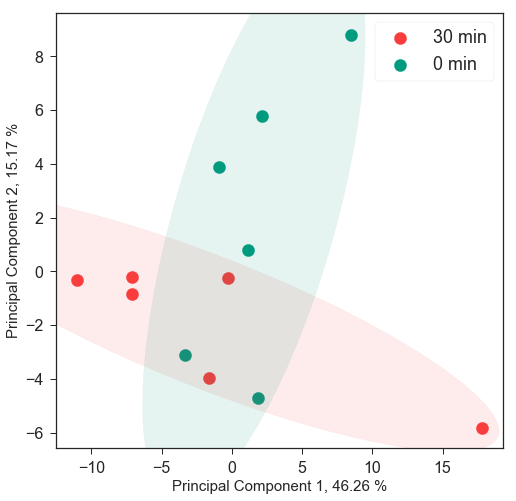

In [6]:
fn = os.path.join(figures_folder, '2018-05-23-proteus-figure_2c_v2.png')
fig = vis.plotPCA(pDf, pc1_var, pc2_var, "time.point", c= colors, nameby="", title = "", 
              filename = fn, el=True)

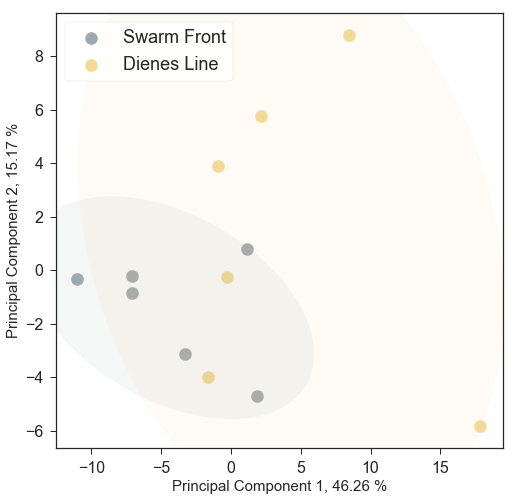

In [8]:
fn = os.path.join(figures_folder, '2018-05-23-proteus-figure_2d_v2.png')
fig = vis.plotPCA(pDf, pc1_var, pc2_var, "position", c= [col3, col4], nameby="", title = "", 
              filename = fn, el=True)

In [9]:
de_file = "/Users/annasintsova/git_repos/proteus/analysis/DESeq/data/2018-04-24-Dienes-line-time.csv"
de_file_swarm = "/Users/annasintsova/git_repos/proteus/analysis/DESeq/data/2018-04-24-Swarm-line-time.csv"
log2change_sw = pd.read_csv(de_file_swarm, index_col=0)
log2change_dl = pd.read_csv(de_file, index_col=0)
#log2change_dl.rename(columns ={"log2FoldChange":"log2FC_DL"}, inplace=True)
log2change_dl

#log2change_sw.rename(columns ={"log2FoldChange":"log2FC_SW"}, inplace=True)
L2FC_new = pd.DataFrame({ wt_L:log2change_sw["log2FoldChange"], mut_L:log2change_dl["log2FoldChange"]}).dropna()
L2FC_new


,Dienes Line,Swarm Front
PMI0229,1.143135,-1.223666
PMI1425,2.219405,-1.966218
PMI1426,2.536457,-1.631109
PMI1427,1.598964,-1.050086
PMI1428,1.559769,-1.156050
PMI1429,1.358556,-1.262715
PMI1430,1.166837,-1.262843
PMI1548,1.045110,-1.380181


In [10]:
log2change_dl ### NEED TO TURN THIS INTO A TABLE 

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
PMI1426,2603.378828,2.536457,0.296311,8.560121,1.127492e-17,3.902250e-14
PMI1425,1440.355775,2.219405,0.320728,6.919898,4.519701e-12,7.821342e-09
PMI2396,2135.792073,2.217305,0.340587,6.510251,7.502518e-11,8.655405e-08
PMI2397,485.584872,1.802089,0.331704,5.432823,5.546949e-08,4.799498e-05
PMI1427,2649.004425,1.598964,0.306140,5.222987,1.760594e-07,8.704882e-05
PMI1428,550.647136,1.559769,0.289869,5.380934,7.410016e-08,5.040265e-05
PMI1429,214.018586,1.358556,0.270262,5.026804,4.987223e-07,2.157597e-04
PMI2572,31.772171,1.341693,0.336366,3.988785,6.641258e-05,1.198243e-02
PMI0236,64.258416,1.325754,0.302935,4.376359,1.206780e-05,2.983333e-03
PMI1002,470.337954,1.243013,0.274416,4.529671,5.907560e-06,1.858733e-03


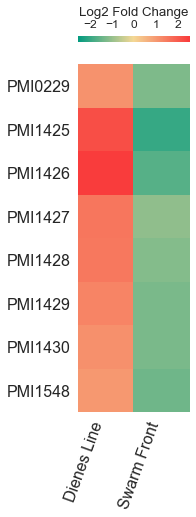

In [13]:
my_cmap = LinearSegmentedColormap.from_list('custom blue', [col2, col4,col1], N=256)
fig = plt.figure(figsize=(2,8))
sns.set(font_scale=1.2)
ax = sns.heatmap(L2FC_new, cmap = my_cmap, cbar_kws = {'use_gridspec':False,'location':"top",
                                  'label': 'Log2 Fold Change',
                                  });
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 16, rotation = 70, ha= "right");
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, rotation = 360);

fig.savefig(os.path.join(figures_folder, "2018-05-17-proteus_rnaseq_figure_2e_v2.png"), dpi=300, bbox_inches="tight")

In [12]:
mk_file = "/Users/annasintsova/git_repos/proteus/analysis/mutant_killing/rpkm/kan_rpkms.csv"
mk = pd.read_csv(mk_file, index_col=0, names=["Kan RPKM"])
mk.index = [i.strip("S") for i in mk.index]
mk = mk.join(line_meta, how = "inner")
#mk["samples"] = [samples[i] for i in mk["group.ID"]]
mk

,Kan RPKM,lane.ID,group.ID,time.point,strain.ID,position,RIN,samples
76067,0.53,L2,Case5,30 min,HI,Swarm Front,6.8,Swarm Front|30 min
76068,0.74,L2,Case5,30 min,HI,Swarm Front,6.1,Swarm Front|30 min
76069,1.57,L2,Case5,30 min,HI,Swarm Front,6.1,Swarm Front|30 min
76070,1.47,L2,Case6,0 min,HI,Swarm Front,6.4,Swarm Front|0 min
76071,4.25,L2,Case6,0 min,HI,Swarm Front,4.5,Swarm Front|0 min
76072,1.62,L2,Case6,0 min,HI,Swarm Front,6.1,Swarm Front|0 min
76079,111.53,L2,Case9,0 min,Mix,Dienes Line,7.4,Dienes Line|0 min
76080,129.75,L2,Case9,0 min,Mix,Dienes Line,7.3,Dienes Line|0 min
76081,78.52,L2,Case9,0 min,Mix,Dienes Line,6.8,Dienes Line|0 min
76082,258.08,L2,Case10,30 min,Mix,Dienes Line,6.2,Dienes Line|30 min


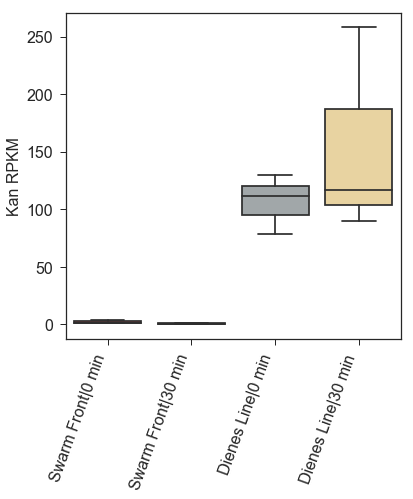

In [13]:
fig = plt.figure(figsize = (6,6))
sns.set_style("ticks")
order = [samples["Case6"], samples["Case5"], samples["Case9"], samples["Case10"]]
ax = sns.boxplot(x= "samples", y="Kan RPKM", data = mk, palette=colors, order=order);
plt.yticks(fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 16,ha="right")
ax.set_xlabel("")
ax.set_ylabel(ax.get_ylabel(), fontsize=16)
fig.savefig(os.path.join(figures_folder, "2018-05-17-proteus_rnaseq_figure_2b.png"), dpi=300, bbox_inches="tight")